In [1]:
import lightningchart as lc
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

In [2]:
generation_data = pd.read_csv('D:/wenprograming23/src/team6/Implementation-of-a-Solar-Power-Modelling-Application-with-LightningChart-Python/Dataset/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('D:/wenprograming23/src/team6/Implementation-of-a-Solar-Power-Modelling-Application-with-LightningChart-Python/Dataset/Plant_2_Weather_Sensor_Data.csv')

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

print(generation_data.head())
print(weather_data.head())

   DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07  
            DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1 2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2 2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3 2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4 2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148 

In [82]:
merged_data = pd.merge(generation_data, weather_data, on=['DATE_TIME', 'PLANT_ID'])
merged_data['DATE_TIME'] = pd.to_datetime(merged_data['DATE_TIME'])
print(merged_data.head())


   DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  2.429011e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
1  1.215279e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  2.247720e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0

In [83]:
selected_features = merged_data[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

corr_matrix = selected_features.corr()

heatmap_data = corr_matrix.values.tolist()

In [96]:
dashboard = lc.Dashboard(
    rows=2,  
    columns=3,  
    theme=lc.Themes.Dark
)

def create_scatter_chart(dashboard, title, x_values, y_values, xlabel, ylabel, column_index, row_index):
    chart = dashboard.ChartXY(
        column_index=column_index,
        row_index=row_index
    )
    chart.set_title(title)

    scatter_series = chart.add_point_series()
    scatter_series.add(x_values, y_values)
    scatter_series.set_point_color(lc.Color(0, 0, 255, 128))

    chart.get_default_x_axis().set_title(xlabel)
    chart.get_default_y_axis().set_title(ylabel)

# Scatter Plots

# AC Power vs. Time
create_scatter_chart(
    dashboard,
    'AC Power vs. Time',
    merged_data['DATE_TIME'].dt.hour + merged_data['DATE_TIME'].dt.minute / 60,
    merged_data['AC_POWER'],
    'Time (hours)',
    'AC Power (kW)',
    column_index=0,
    row_index=0
)

# AC Power vs. Irradiation
create_scatter_chart(
    dashboard,
    'AC Power vs. Irradiation',
    merged_data['IRRADIATION'],
    merged_data['AC_POWER'],
    'Irradiation (Wm^-2)',
    'AC Power (kW)',
    column_index=1,
    row_index=0
)

# AC Power vs. Module Temperature
create_scatter_chart(
    dashboard,
    'AC Power vs. Module Temperature',
    merged_data['MODULE_TEMPERATURE'],
    merged_data['AC_POWER'],
    'Module Temperature (Celsius)',
    'AC Power (kW)',
    column_index=2,
    row_index=0
)

# AC Power vs. Ambient Temperature
create_scatter_chart(
    dashboard,
    'AC Power vs. Ambient Temperature',
    merged_data['AMBIENT_TEMPERATURE'],
    merged_data['AC_POWER'],
    'Ambient Temperature (Celsius)',
    'AC Power (kW)',
    column_index=0,
    row_index=1
)

# AC Power vs. Daily Yield
create_scatter_chart(
    dashboard,
    'AC Power vs. Daily Yield',
    merged_data['DAILY_YIELD'],
    merged_data['AC_POWER'],
    'Daily Yield (Wh)',
    'AC Power (kW)',
    column_index=1,
    row_index=1
)

# AC Power vs. Total Yield
create_scatter_chart(
    dashboard,
    'AC Power vs. Total Yield',
    merged_data['TOTAL_YIELD'],
    merged_data['AC_POWER'],
    'Total Yield (Wh)',
    'AC Power (kW)',
    column_index=2,
    row_index=1
)

# Open the dashboard
dashboard.open('browser')

127.0.0.1 - - [24/Aug/2024 12:33:29] "GET / HTTP/1.1" 200 -


In [97]:
features = ['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'AC_POWER']
source_keys = merged_data['SOURCE_KEY_x'].unique()

chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Correlation Heatmap of Solar Plant Features'
)

# Create the heatmap grid series
series = chart.add_heatmap_grid_series(
    columns=len(heatmap_data),
    rows=len(heatmap_data[0])
)

# Customize the heatmap
series.hide_wireframe()
series.set_intensity_interpolation(False)
series.invalidate_intensity_values(heatmap_data)

# Define color steps for the heatmap
series.set_palette_colors(
    steps=[
        {"value": -1.0, "color": lc.Color(0, 0, 255)},  # Blue for negative correlation
        {"value": 0.0, "color": lc.Color(255, 255, 255)},  # White for no correlation
        {"value": 1.0, "color": lc.Color(255, 0, 0)}  # Red for positive correlation
    ],
    look_up_property='value',
    percentage_values=False
)

# Customize the x and y axes
x_axis = chart.get_default_x_axis()
x_axis.set_title('Feature Index')
x_axis.set_interval(0, len(selected_features.columns))

y_axis = chart.get_default_y_axis()
y_axis.set_title('Feature Index')
y_axis.set_interval(0, len(selected_features.columns))

# Open the chart
chart.open('browser')


127.0.0.1 - - [24/Aug/2024 12:33:41] "GET / HTTP/1.1" 200 -


In [88]:
features = merged_data[['IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
target = merged_data['AC_POWER']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}


In [89]:
dashboard = lc.Dashboard(
    columns=3,
    rows=2,
    theme=lc.Themes.Dark
)

def add_feature_importance_to_dashboard(dashboard, model_name, importances, column_index, row_index):
    """
    Add a feature importance bar chart to the dashboard.
    """
    importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    chart = dashboard.BarChart(
        column_index=column_index,
        row_index=row_index,
        row_span=1,
        column_span=1
    )
    chart.set_title(f'{model_name} Feature Importances')
    
    bar_data = [{'category': str(row['Feature']), 'value': float(row['Importance'])} for _, row in importance_df.iterrows()]
    chart.set_data(bar_data)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.columns)
    ])

for i, (model_name, model) in enumerate(models.items()):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)  
    else:
        importances = np.zeros(len(features.columns))

    add_feature_importance_to_dashboard(
        dashboard=dashboard,
        model_name=model_name,
        importances=importances,
        column_index=i % 3,
        row_index=i // 3
    )

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
]

voting_reg = VotingRegressor(estimators=estimators)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', voting_reg)
])

pipeline.fit(X_train, y_train)

ensemble_importances = np.mean([
    pipeline.named_steps['regressor'].estimators_[i].feature_importances_
    for i in range(len(pipeline.named_steps['regressor'].estimators_))
], axis=0)

add_feature_importance_to_dashboard(
    dashboard=dashboard,
    model_name='Ensemble Methods',
    importances=ensemble_importances,
    column_index=2,
    row_index=1
)

dashboard.open('browser')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 3
[LightGBM] [Info] Start training from score 241.709585
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 3
[LightGBM] [Info] Start training from score 241.709585


127.0.0.1 - - [24/Aug/2024 10:43:59] "GET / HTTP/1.1" 200 -


In [90]:
dashboard = lc.Dashboard(
    columns=3,
    rows=2,
    theme=lc.Themes.Dark
)

def add_prediction_vs_actual_to_dashboard(dashboard, model_name, model, column_index, row_index):
    """
    Add a plot of predicted vs actual values to the dashboard.
    """
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    # Convert all to float64 to avoid serialization issues
    y_test_float = y_test.astype('float64')
    y_pred_float = y_pred.astype('float64')
    
    chart = dashboard.ChartXY(column_index=column_index, row_index=row_index, column_span=1, row_span=1)
    chart.set_title(f'{model_name} Predictions vs Actual')
    
    pred_series = chart.add_point_series()
    pred_series.add(y_test_float.tolist(), y_pred_float.tolist()).set_name('Predicted vs Actual')
    
    line_series = chart.add_line_series()
    min_val = min(min(y_test_float), min(y_pred_float))
    max_val = max(max(y_test_float), max(y_pred_float))
    line_series.add([min_val, max_val], [min_val, max_val])
    line_series.set_name('Ideal Line')
    
    chart.get_default_x_axis().set_title('Actual AC Power')
    chart.get_default_y_axis().set_title('Predicted AC Power')
    
    legend = chart.add_legend(horizontal=False)
    legend.add(pred_series)
    legend.add(line_series)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features.columns)
    ])

for i, (model_name, model) in enumerate(models.items()):
    add_prediction_vs_actual_to_dashboard(dashboard, model_name, model, column_index=i % 3, row_index=i // 3)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
]

voting_reg = VotingRegressor(estimators=estimators)

add_prediction_vs_actual_to_dashboard(dashboard, 'Ensemble Methods', voting_reg, column_index=2, row_index=1)

dashboard.open('browser')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 3
[LightGBM] [Info] Start training from score 241.709585
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 3
[LightGBM] [Info] Start training from score 241.709585


127.0.0.1 - - [24/Aug/2024 10:44:18] "GET / HTTP/1.1" 200 -


In [100]:
# Feature selection
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

X = merged_data[features]
y = merged_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

# Generate random predictions for the next couple of days
future_dates = pd.date_range(start='2020-05-16', periods=48, freq='H')
random_weather_data = {
    'AMBIENT_TEMPERATURE': np.random.uniform(X['AMBIENT_TEMPERATURE'].min(), X['AMBIENT_TEMPERATURE'].max(), len(future_dates)),
    'MODULE_TEMPERATURE': np.random.uniform(X['MODULE_TEMPERATURE'].min(), X['MODULE_TEMPERATURE'].max(), len(future_dates)),
    'IRRADIATION': np.random.uniform(X['IRRADIATION'].min(), X['IRRADIATION'].max(), len(future_dates))
}
future_weather_df = pd.DataFrame(random_weather_data, index=future_dates)

# Reorder the columns to match the training data's order
future_weather_df = future_weather_df[features]

# Predict future power generation
future_predictions = model.predict(future_weather_df)

# Combine future predictions with dates
future_results = pd.DataFrame({'DATE_TIME': future_dates, 'Predicted_AC_POWER': future_predictions})
print(future_results.head(10))

Mean Squared Error on test set: 41978.26447402709
            DATE_TIME  Predicted_AC_POWER
0 2020-05-16 00:00:00          460.431640
1 2020-05-16 01:00:00          514.717728
2 2020-05-16 02:00:00          200.320886
3 2020-05-16 03:00:00          716.374183
4 2020-05-16 04:00:00          671.941628
5 2020-05-16 05:00:00          466.981393
6 2020-05-16 06:00:00          781.734733
7 2020-05-16 07:00:00          316.543768
8 2020-05-16 08:00:00           15.088202
9 2020-05-16 09:00:00          464.762023


C:\Users\Soroush\AppData\Local\Temp\ipykernel_22480\1773504532.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start='2020-05-16', periods=48, freq='H')


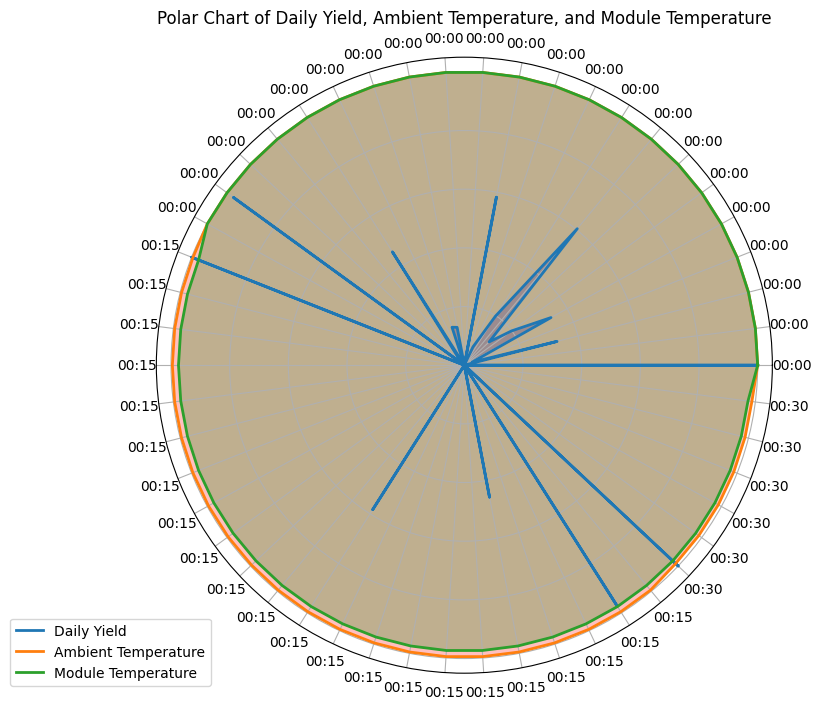

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
generation_data = pd.read_csv('D:/wenprograming23/src/team6/Implementation-of-a-Solar-Power-Modelling-Application-with-LightningChart-Python/Dataset/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('D:/wenprograming23/src/team6/Implementation-of-a-Solar-Power-Modelling-Application-with-LightningChart-Python/Dataset/Plant_2_Weather_Sensor_Data.csv')


# Convert DATE_TIME to datetime
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge datasets on DATE_TIME and PLANT_ID
merged_data = pd.merge(generation_data, weather_data, on=['DATE_TIME', 'PLANT_ID'])

# Let's select a small subset of the data for visualization
subset_data = merged_data[['DATE_TIME', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].head(50)

# Normalize data for better visualization on the polar chart
subset_data['DAILY_YIELD'] = subset_data['DAILY_YIELD'] / subset_data['DAILY_YIELD'].max()
subset_data['AMBIENT_TEMPERATURE'] = subset_data['AMBIENT_TEMPERATURE'] / subset_data['AMBIENT_TEMPERATURE'].max()
subset_data['MODULE_TEMPERATURE'] = subset_data['MODULE_TEMPERATURE'] / subset_data['MODULE_TEMPERATURE'].max()

# Create a polar plot
angles = np.linspace(0, 2 * np.pi, len(subset_data), endpoint=False).tolist()

# We need to "complete the loop" for a polar plot
values_daily_yield = subset_data['DAILY_YIELD'].tolist()
values_daily_yield += values_daily_yield[:1]

values_ambient_temp = subset_data['AMBIENT_TEMPERATURE'].tolist()
values_ambient_temp += values_ambient_temp[:1]

values_module_temp = subset_data['MODULE_TEMPERATURE'].tolist()
values_module_temp += values_module_temp[:1]

angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values_daily_yield, linewidth=2, linestyle='solid', label='Daily Yield')
ax.fill(angles, values_daily_yield, color='b', alpha=0.25)

ax.plot(angles, values_ambient_temp, linewidth=2, linestyle='solid', label='Ambient Temperature')
ax.fill(angles, values_ambient_temp, color='r', alpha=0.25)

ax.plot(angles, values_module_temp, linewidth=2, linestyle='solid', label='Module Temperature')
ax.fill(angles, values_module_temp, color='g', alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Set the labels around the circle
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([date.strftime('%H:%M') for date in subset_data['DATE_TIME']])

plt.title('Polar Chart of Daily Yield, Ambient Temperature, and Module Temperature')
plt.show()
